In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

import sys
sys.path.append("../packages")

import auxiliary as aux
from auxiliary import theta
import edges

In [3]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)

yy, xx = np.meshgrid(y, x)

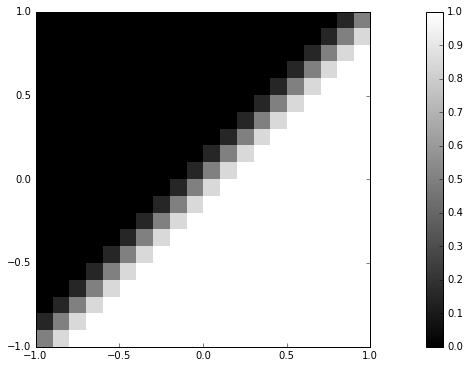

In [4]:
smoothing_function = edges.make_skewed_edge(0.3, 1)

fig = plt.figure(figsize=(20, 6))
sub1 = fig.add_subplot(1, 1, 1)
aux.imshow(smoothing_function(-xx+yy), extent=[-1, 1, -1, 1])
plt.colorbar()

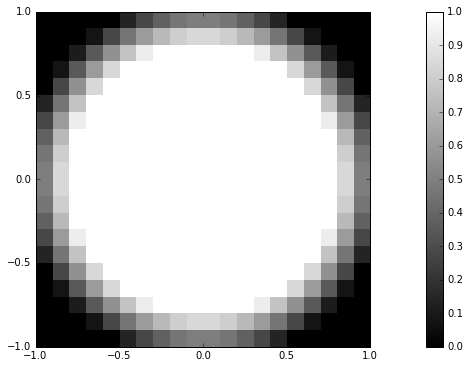

In [5]:
# Circular density distribution
dd = 1 - np.sqrt(xx**2+yy**2)

fig = plt.figure(figsize=(20, 6))
sub1 = fig.add_subplot(1, 1, 1)
aux.imshow(smoothing_function(dd), extent=[-1, 1, -1, 1])
plt.colorbar()

10
10


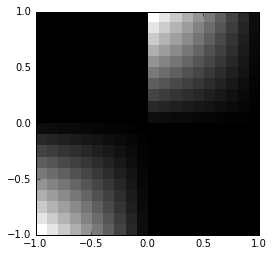

In [17]:
# Rectangular density distribution
ax = -0.4
bx = 0.4
ay = -0.3
by = 0.3

xres = 20
xmin = -1
xmax = 1
yres = 20
ymin = -1
ymax = 1

center_idx = int(xres * (0.5*(bx+ax)-xmin) / (xmax - xmin))
center_idy = int(yres * (0.5*(by+ay)-ymin) / (ymax - ymin))
print(center_idx)
print(center_idy)


dd = np.zeros(shape=xx.shape)
dd[0:center_idy, 0:center_idx] = xx[0:center_idy, 0:center_idx] * yy[0:center_idy, 0:center_idx]
dd[center_idy:dd.shape[0], center_idx:dd.shape[1]] = xx[0:center_idy, 0:center_idx][::-1] * yy[0:center_idy, 0:center_idx][::-1]
aux.imshow(dd, extent=[-1,1,-1,1])

In [8]:
print(x[::-1])

[ 1.          0.89473684  0.78947368  0.68421053  0.57894737  0.47368421
  0.36842105  0.26315789  0.15789474  0.05263158 -0.05263158 -0.15789474
 -0.26315789 -0.36842105 -0.47368421 -0.57894737 -0.68421053 -0.78947368
 -0.89473684 -1.        ]


In [ ]:
edge_function = lambda x : 2*edges.make_skewed_edge(0.2, 1)(x)-1
fig = plt.figure(figsize=(20, 6))
sub1 = fig.add_subplot(1, 1, 1)
aux.imshow(edge_function(yy)-xx, extent=[-1, 1, -1, 1])
plt.colorbar()

In [ ]:
f = lambda x : 0.5*(1+np.sin(x*np.pi)) * (np.abs(x)<0.5) + 0.5*(np.sign(x)+1) * (np.abs(x)>=0.5)
df = lambda x : 0.5*(1+np.cos(x*np.pi)) * (np.abs(x)<0.5)
#plt.plot(x, f(x), x, df(x))

fig = plt.figure(figsize=(20, 6))
sub1 = fig.add_subplot(1, 1, 1)
aux.imshow(theta(-xx+f(yy)), extent=[-1, 1, -1, 1])
plt.colorbar()

In [ ]:
#dd = e(-xx + 2.*yy + 1.) * e(-xx) * e(-xx - 2.*yy + 1.)
dd1 = e1(-0.5*xx + yy + 0.5) * e1(-xx) * e1(-0.5*xx - yy + 0.5)
dd2 = e2(-0.5*xx + yy + 0.5) * e2(-xx) * e2(-0.5*xx - yy + 0.5) 


idx = 11
idy = 10
fig = plt.figure(figsize=(20, 10))

sub1 = fig.add_subplot(2, 2, 1)
aux.imshow(dd, extent=[-1, 1, -1, 1])
plt.plot(y, x[idx]*np.ones(shape=y.shape), color='b')
plt.plot(y[idy]*np.ones(shape=x.shape), x, color='g')
plt.colorbar()

sub2 = fig.add_subplot(2, 2, 2)
plt.plot(dd[:, idy], x, color='g')
sub2.set_xlim([0, 1])

sub3 = fig.add_subplot(2, 2, 3)
plt.plot(y, dd[idx, :], color='b')
sub3.set_ylim([0, 1])


print(dd1.sum())
print(dd2.sum())

In [ ]:
import edges
import grating
import jitter

xmin = -1e-6
xmax =  1e-6
xres =  256

ymin = -1e-6
ymax =  1e-6
yres =  256

zmin = -1e-6
zmax =  1e-6
zres =  256

x = np.linspace(xmin, xmax, xres)
y = np.linspace(xmin, xmax, xres)
z = np.linspace(xmin, xmax, xres)

xx, yy = np.meshgrid(x, y)
xxx, yyy, zzz = np.meshgrid(x, y, z)

edge_width = 50e-9
pitch = 400e-9
vfs = 0.5*pitch
hfs = 0.5*pitch

edge             = edges.make_erf_edge(edge_width, vfs)
#edge             = edges.make_skewed_edge(parameters['edge_width'], parameters['vfs'])
#edge             = edges.make_perf_edge(parameters['edge_width'], parameters['vfs'])
feature          = grating.symm_feat(hfs, edge)
grating_function = grating.feature_grating(pitch, feature)

theta()

fig = plt.figure(figsize=(20, 6))
sub1 = fig.add_subplot(1, 1, 1)
plt.plot(y, grating_function(y))


In [ ]:
print('{:03.1f}'.format(12.345))
fig = plt.figure()
plt.close(fig)